In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve

In [45]:
df = pd.read_csv('../00_data/00_statistical_data/E0_processed.csv')

df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)

df

,Date,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,HS,AS,...,HomeTeam_FullTimeGoals_mean,HomeTeam_Shots_mean,HomeTeam_ShotsOnTarget_mean,HomeTeam_Corners_mean,HomeTeam_Fouls_mean,HomeTeam_YellowCards_mean,HomeTeam_points,HomeTeamRate,AwayTeamRate,season
19,2000-08-26,Arsenal,Charlton,H,5.0,3.0,1.0,2.0,18.0,7.0,...,1.0,12.5,7.0,6.0,17.5,2.5,1.5,2.526316,0.736842,2001
20,2000-08-26,Bradford,Leicester,D,0.0,0.0,0.0,0.0,8.0,13.0,...,1.0,14.0,6.5,6.0,11.0,0.5,1.5,1.000000,0.736842,2001
21,2000-08-26,Everton,Derby,D,2.0,2.0,2.0,0.0,12.0,7.0,...,1.5,15.0,8.0,4.5,19.0,1.5,1.5,1.368421,0.578947,2001
22,2000-08-26,Ipswich,Sunderland,H,1.0,0.0,0.0,0.0,14.0,9.0,...,1.0,16.5,7.0,3.5,12.0,0.5,0.5,2.000000,1.210526,2001
23,2000-08-26,Man City,Coventry,A,1.0,2.0,0.0,2.0,14.0,9.0,...,2.0,16.0,12.0,6.5,18.5,2.0,1.5,0.789474,0.789474,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,2024-05-19,Crystal Palace,Aston Villa,H,5.0,0.0,2.0,0.0,15.0,8.0,...,2.6,15.6,6.6,6.0,11.0,2.0,2.6,1.473684,1.473684,2024
9116,2024-05-19,Liverpool,Wolves,H,2.0,0.0,2.0,0.0,36.0,4.0,...,1.4,16.6,7.4,4.6,8.8,1.0,1.6,2.526316,1.000000,2024
9117,2024-05-19,Luton,Fulham,A,2.0,4.0,1.0,2.0,15.0,15.0,...,0.6,18.8,6.8,7.0,11.4,1.4,0.2,0.842105,0.947368,2024
9118,2024-05-19,Man City,West Ham,H,3.0,1.0,2.0,1.0,28.0,3.0,...,2.0,10.4,4.6,4.4,9.0,1.2,3.0,2.473684,1.210526,2024


In [46]:
X = df[['AwayTeam_FullTimeGoals_mean', 'AwayTeam_Shots_mean',
       'AwayTeam_ShotsOnTarget_mean', 'AwayTeam_Corners_mean',
       'AwayTeam_Fouls_mean', 'AwayTeam_YellowCards_mean', 'AwayTeam_points',
       'HomeTeam_FullTimeGoals_mean', 'HomeTeam_Shots_mean',
       'HomeTeam_ShotsOnTarget_mean', 'HomeTeam_Corners_mean',
       'HomeTeam_Fouls_mean', 'HomeTeam_YellowCards_mean', 'HomeTeam_points',
       'HomeTeamRate', 'AwayTeamRate'
]]

y = df['FTR']

y = y.map({'H': 0, 'D': 1, 'A': 2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12239164)

# XGBoost

In [47]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.75      0.69       820
           1       0.28      0.16      0.21       403
           2       0.52      0.52      0.52       498

    accuracy                           0.55      1721
   macro avg       0.48      0.48      0.47      1721
weighted avg       0.52      0.55      0.53      1721



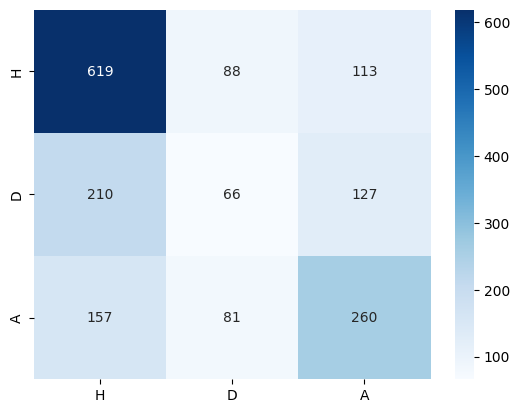

In [48]:
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['H', 'D', 'A'], yticklabels=['H', 'D', 'A'])
plt.show()

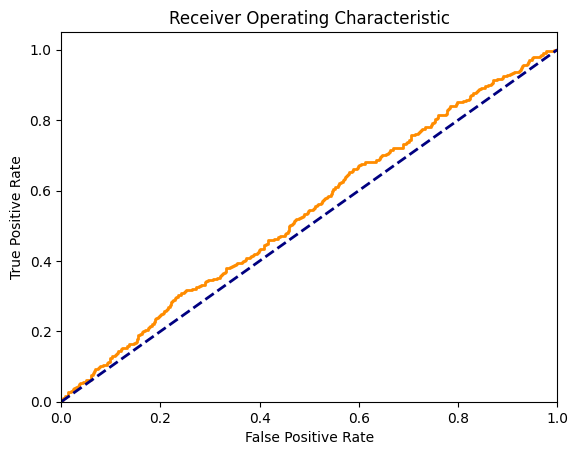

In [ ]:
y_pred_prob = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)

plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

# LightGBM

In [38]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test, verbose=0)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.79      0.70       820
           1       0.27      0.12      0.16       403
           2       0.56      0.56      0.56       498

    accuracy                           0.57      1721
   macro avg       0.48      0.49      0.47      1721
weighted avg       0.52      0.57      0.53      1721



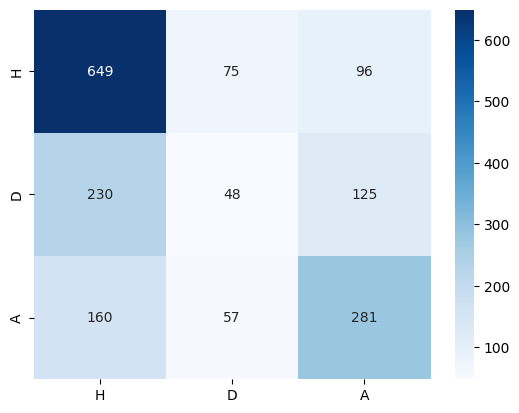

In [39]:
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['H', 'D', 'A'], yticklabels=['H', 'D', 'A'])
plt.show()

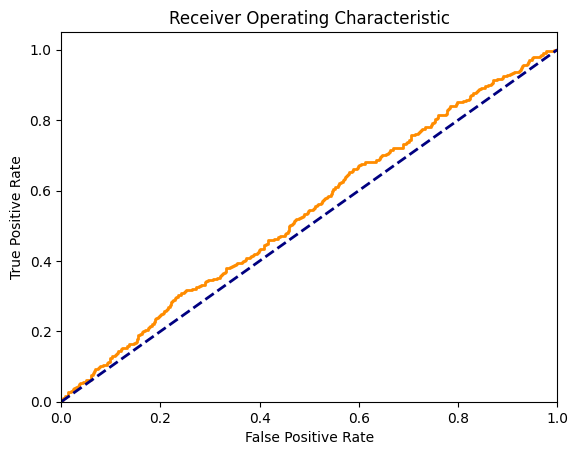

In [53]:
y_pred_prob = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)

plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

# CatBoost

In [40]:
import catboost as cb

model = cb.CatBoostClassifier()

model.fit(X_train, y_train, verbose=False)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       820
           1       0.26      0.14      0.19       403
           2       0.55      0.56      0.56       498

    accuracy                           0.56      1721
   macro avg       0.48      0.49      0.48      1721
weighted avg       0.52      0.56      0.53      1721



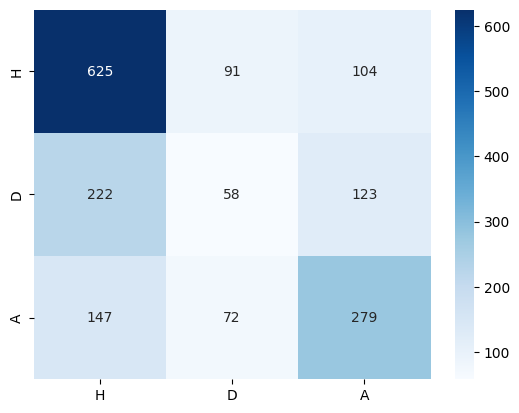

In [41]:
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['H', 'D', 'A'], yticklabels=['H', 'D', 'A'])
plt.show()

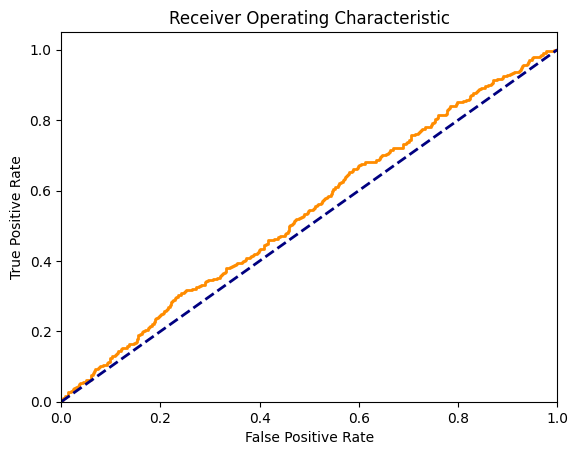

In [54]:
y_pred_prob = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)

plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()